In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets 
from matplotlib import pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
data = datasets.fetch_california_housing()
print(data.DESCR)
print(data)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
df = pd.concat([pd.DataFrame(data.data), pd.Series(data.target)], axis = 1)
df.columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 
              'MedHouseVal']
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


Получила данные и занесла в датафрейм. Дальше проверяем на пропуски и ( по условиям домашки) удаляем их. 

In [4]:
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Признаков пропусков я не наблюдаю. Во-первых совпадает количество строк по каждой колонке. Во-вторых минимальные значения по каждой из колонок отличны от нуля.
При этом теоретически в этом датасете могут быть выбросы. 

In [6]:
x = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = df['MedHouseVal']



In [7]:
def get_score(x, y, random_seed = 42, model = None, print_metrics = False):
    if model is None:
        model = LinearRegression()
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = random_seed) 
    
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    if print_metrics:
        print(f'Корень из среднеквадратичной ошибки (RMSE) {rmse}')
        print(f'Коэффициент детерминации (R2) {r2}')
        
    return mse, rmse, r2

In [8]:
mse_1, rmse_1, r2_1 = get_score(x = x, y = y, print_metrics = True)

Корень из среднеквадратичной ошибки (RMSE) 0.7455813830127764
Коэффициент детерминации (R2) 0.5757877060324508


Далее строю график распределения целевой перемененой, смотрю есть ли видимые выбросы

<AxesSubplot:xlabel='MedHouseVal', ylabel='Density'>

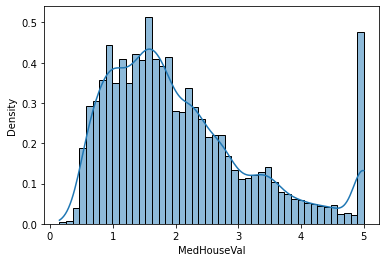

In [9]:
sns.histplot(y, kde = True, stat = "density", linewidth = 1)

In [10]:
y.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

<AxesSubplot:title={'center':'Распределение целевой переменной'}>

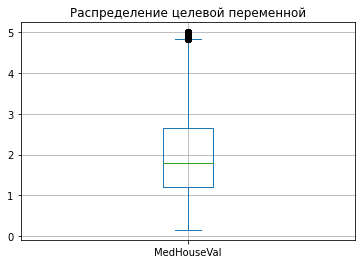

In [11]:
y.plot(kind = 'box', title = "Распределение целевой переменной", grid = True)

Абсолюно точно есть выбросы, осталось их найти и убрать 

In [12]:
df = df[df.MedHouseVal <= 4.75]

In [13]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


окей, дальше корреляционная матрица 

<AxesSubplot:>

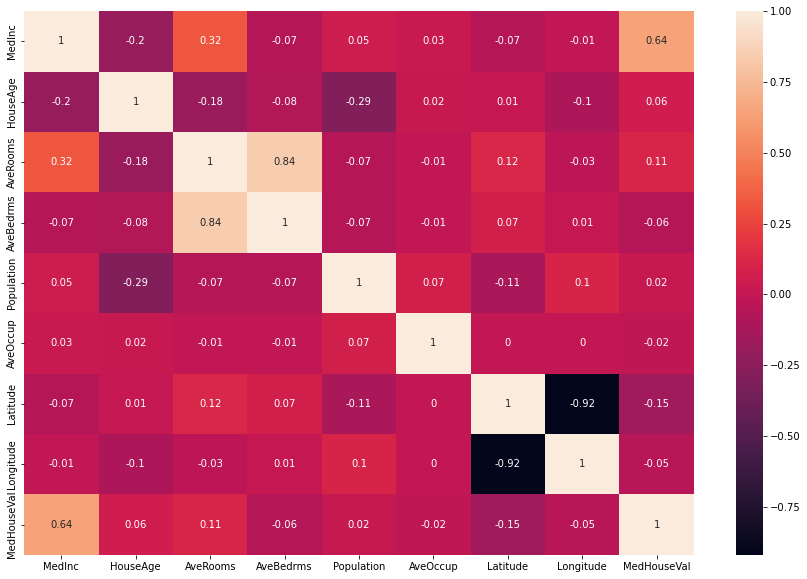

In [14]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr().round(2), annot = True)

По этим данным видно, что цена недвижимости больше всего коррелирует с:

MedInc - средний доход в группе, чем богаче человек, тем дороже жилье может себе позволить.


Также есть заметная корреляция:

AveRooms и AveBedrms - чем больше комнат в доме тем больше спален
AveRooms и MedInc - чем больше доход, тем больший дом можно себе позволить с большим количеством комнат

Далее удаляю признаки на основании полученных значений

In [15]:
del df['Population'], df['AveOccup'], df['Longitude'], df['Latitude']

In [16]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [17]:
x1 = df[df.columns[:-1]]
x1

,MedInc,HouseAge,AveRooms,AveBedrms
0,8.3252,41.0,6.984127,1.023810
1,8.3014,21.0,6.238137,0.971880
2,7.2574,52.0,8.288136,1.073446
3,5.6431,52.0,5.817352,1.073059
4,3.8462,52.0,6.281853,1.081081
...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333
20636,2.5568,18.0,6.114035,1.315789
20637,1.7000,17.0,5.205543,1.120092
20638,1.8672,18.0,5.329513,1.171920


In [18]:
y1 = df.MedHouseVal

Теперь повторяем пункты 3 и 4(обучаем и проверяем точность)

In [19]:
mse_2, rmse_2, r2_2 = get_score(x = x1, y = y1, print_metrics = True)

Корень из среднеквадратичной ошибки (RMSE) 0.6895675572305825
Коэффициент детерминации (R2) 0.487197719530426


показатели стали немного меньше, это интересно и странно. Работаю дальше


<AxesSubplot:>

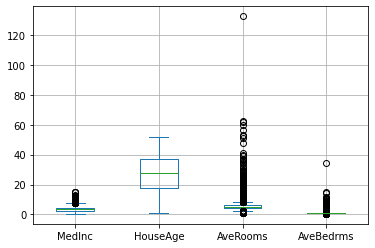

In [20]:
df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms']].plot(kind = 'box', grid = True)

Итак, видно не очень, но в MedInc можно почистить выбросы более 15, в AveRooms более 30 +-, в AveBedrms более ~18

In [21]:
df = df[df.MedInc <= 15.0]
df = df[df.AveRooms <= 30.0]
df = df[df.AveBedrms <= 18.0]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19515 entries, 0 to 20639
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       19515 non-null  float64
 1   HouseAge     19515 non-null  float64
 2   AveRooms     19515 non-null  float64
 3   AveBedrms    19515 non-null  float64
 4   MedHouseVal  19515 non-null  float64
dtypes: float64(5)
memory usage: 914.8 KB


<AxesSubplot:>

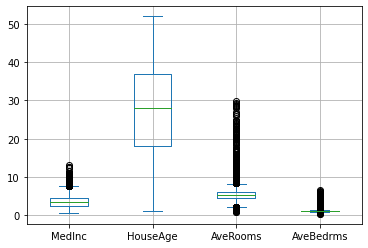

In [23]:
df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms']].plot(kind = 'box', grid = True)

Выбросы остались, но они более плотные, чем те, которые я удалила, так что посмотрм сейчас на результат

In [24]:
x2 = df[df.columns[:-1]]
x2

,MedInc,HouseAge,AveRooms,AveBedrms
0,8.3252,41.0,6.984127,1.023810
1,8.3014,21.0,6.238137,0.971880
2,7.2574,52.0,8.288136,1.073446
3,5.6431,52.0,5.817352,1.073059
4,3.8462,52.0,6.281853,1.081081
...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333
20636,2.5568,18.0,6.114035,1.315789
20637,1.7000,17.0,5.205543,1.120092
20638,1.8672,18.0,5.329513,1.171920


In [25]:
y2 = df.MedHouseVal

In [26]:
mse_3, rmse_3, r2_3 = get_score(x = x2, y = y2, print_metrics = True)

Корень из среднеквадратичной ошибки (RMSE) 0.6723030691572538
Коэффициент детерминации (R2) 0.49829090780000485


Окей, по точности сдвинулись, вроде ок 

Сначала хочу извлечь квадратный корень из среднего дохода квартала 

In [27]:
df['MedInc'] = df['MedInc'].apply(lambda x:  math.sqrt(x))
df

,MedInc,HouseAge,AveRooms,AveBedrms,MedHouseVal
0,2.885342,41.0,6.984127,1.023810,4.526
1,2.881215,21.0,6.238137,0.971880,3.585
2,2.693956,52.0,8.288136,1.073446,3.521
3,2.375521,52.0,5.817352,1.073059,3.413
4,1.961173,52.0,6.281853,1.081081,3.422
...,...,...,...,...,...
20635,1.249120,25.0,5.045455,1.133333,0.781
20636,1.599000,18.0,6.114035,1.315789,0.771
20637,1.303840,17.0,5.205543,1.120092,0.923
20638,1.366455,18.0,5.329513,1.171920,0.847


Теперь логорифм из среднего возраста дома в квартале 

In [28]:
df['HouseAge'] = (df['HouseAge'] - df['HouseAge'].min() + 1) .transform(np.log)
df

,MedInc,HouseAge,AveRooms,AveBedrms,MedHouseVal
0,2.885342,3.713572,6.984127,1.023810,4.526
1,2.881215,3.044522,6.238137,0.971880,3.585
2,2.693956,3.951244,8.288136,1.073446,3.521
3,2.375521,3.951244,5.817352,1.073059,3.413
4,1.961173,3.951244,6.281853,1.081081,3.422
...,...,...,...,...,...
20635,1.249120,3.218876,5.045455,1.133333,0.781
20636,1.599000,2.890372,6.114035,1.315789,0.771
20637,1.303840,2.833213,5.205543,1.120092,0.923
20638,1.366455,2.890372,5.329513,1.171920,0.847


In [31]:
x3 = df[df.columns[:-1]]
y3 = df.MedHouseVal

In [32]:
mse_4, rmse_4, r2_4 = get_score(x = x3, y = y3, print_metrics = True)

Корень из среднеквадратичной ошибки (RMSE) 0.6836714202429542
Коэффициент детерминации (R2) 0.48118008947498214


И итоговый дф со всеми показателями 

In [33]:
my_df = pd.DataFrame({'model': ['первоночальные данные', 'удаление 4х признаков', 'подчищеннве выбросов',
                                'математические действия'], 
                      'rmse': [rmse_1, rmse_2, rmse_3, rmse_4],
                      'r2': [r2_1, r2_2, r2_3, r2_4]})
my_df

,model,rmse,r2
0,первоночальные данные,0.745581,0.575788
1,удаление 4х признаков,0.689568,0.487198
2,подчищеннве выбросов,0.672303,0.498291
3,математические действия,0.683671,0.481180
